# Jeg prøver en konkurrence på kaggle, hvor jeg skal bruge unsupervised k-means clustering.

https://www.kaggle.com/competitions/k-means-clustering-for-heart-disease-analysis/overview

In [1]:
import pandas as pd
import numpy as np
from numpy.random import uniform
import Utilities
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
from matplotlib.colors import ListedColormap
from time import sleep
from IPython import display

In [2]:
sns.set_style('white')

cmap = ListedColormap(sns.xkcd_palette(['denim blue', 
                                        'medium green', 
                                        'pale red']))



In [3]:
cmap = ListedColormap(sns.color_palette('Paired', 10))

# split data op i trænings og test data

In [4]:
data = pd.read_csv('data/heart_disease_filtered.csv')
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

print(X_train['age'].count())
print(X_test['age'].count())

X_train.head()

87
22


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
65,77,Male,Cleveland,asymptomatic,125.0,304.0,False,lv hypertrophy,162.0,True,0.0,upsloping,3.0,normal
26,59,Male,Cleveland,asymptomatic,170.0,326.0,False,lv hypertrophy,140.0,True,3.4,downsloping,0.0,reversable defect
22,54,Male,Cleveland,non-anginal,125.0,273.0,False,lv hypertrophy,152.0,False,0.5,downsloping,1.0,normal
31,48,Male,Cleveland,atypical angina,130.0,245.0,False,lv hypertrophy,180.0,False,0.2,flat,0.0,normal
47,65,Male,Cleveland,typical angina,138.0,282.0,True,lv hypertrophy,174.0,False,1.4,flat,1.0,normal


# Normaliser data.

Man skal normalisere træningsdata og testdata seperat. Hvis man skalere inden split, vil det lede til data lækage og data bias.

------------------------------------------------------------------------------------------------------------------------------------------------------------
Correct! When it comes to scaling data for machine learning, it’s generally recommended to avoid scaling the test data directly. Instead, follow these steps:

Split the Data: First, split your dataset into training and test subsets. The training set will be used for model training, while the test set remains untouched until evaluation.

Scale the Training Data: Apply the scaling transformation (such as standardization or normalization) only to the training data. This ensures that the model learns from standardized features during training.

Keep Test Data Untouched: The test data should remain in its original form (unscaled) throughout the process. This prevents any information leakage from the test set into the training process.

Evaluate Model Performance: After training your model using the scaled training data, evaluate its performance on the unscaled test data. This provides a realistic assessment of how well the model generalizes to new, unseen examples.

## label encoding for categorical variables:

metoden LabelEncode findes i Utilities.py filen

In [5]:
X_train = Utilities.LabelEncode(X_train)
X_test = Utilities.LabelEncode(X_test)

X_train.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
65,77,1,0,0,125.0,304.0,0,0,162.0,1,0.0,2,3.0,1
26,59,1,0,0,170.0,326.0,0,0,140.0,1,3.4,0,0.0,2
22,54,1,0,2,125.0,273.0,0,0,152.0,0,0.5,0,1.0,1
31,48,1,0,1,130.0,245.0,0,0,180.0,0,0.2,1,0.0,1
47,65,1,0,3,138.0,282.0,1,0,174.0,0,1.4,1,1.0,1


## Numerisk skalering med standardscaler

In [6]:
scaler = StandardScaler()

numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.fit_transform(X_test[numerical_cols])

X_train.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
65,2.458593,1,0,0,-0.349258,1.028100,0,0,0.486098,1,-0.877114,2,3.0,1
26,0.546896,1,0,0,1.895973,1.422129,0,0,-0.453691,1,1.868392,0,0.0,2
22,0.015870,1,0,2,-0.349258,0.472877,0,0,0.058921,0,-0.473363,0,1.0,1
31,-0.621362,1,0,1,-0.099788,-0.028616,0,0,1.255016,0,-0.715614,1,0.0,1
47,1.184128,1,0,3,0.299364,0.634070,1,0,0.998710,0,0.253389,1,1.0,1


In [7]:
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train)

## Træn modellen

n_init: hvor mange gange modellen kører.
n_clusters: hvor mange clusters jeg vil have bliver lavet.

In [8]:
n_cluster = 2
model = KMeans(n_clusters=n_cluster, random_state=42, n_init=10)

model.fit(X_pca_train)

print(silhouette_score(X_pca_train, model.labels_))

c:\Users\Christian\anaconda3\envs\ml-env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.4117056460452256


## Se cluster labels

In [9]:
cluster_labels_train = model.labels_

print(cluster_labels_train)

[1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0
 0 1 0 0 0 0 1 0 1 1 0 0 1]


## Simpelt cluster plot

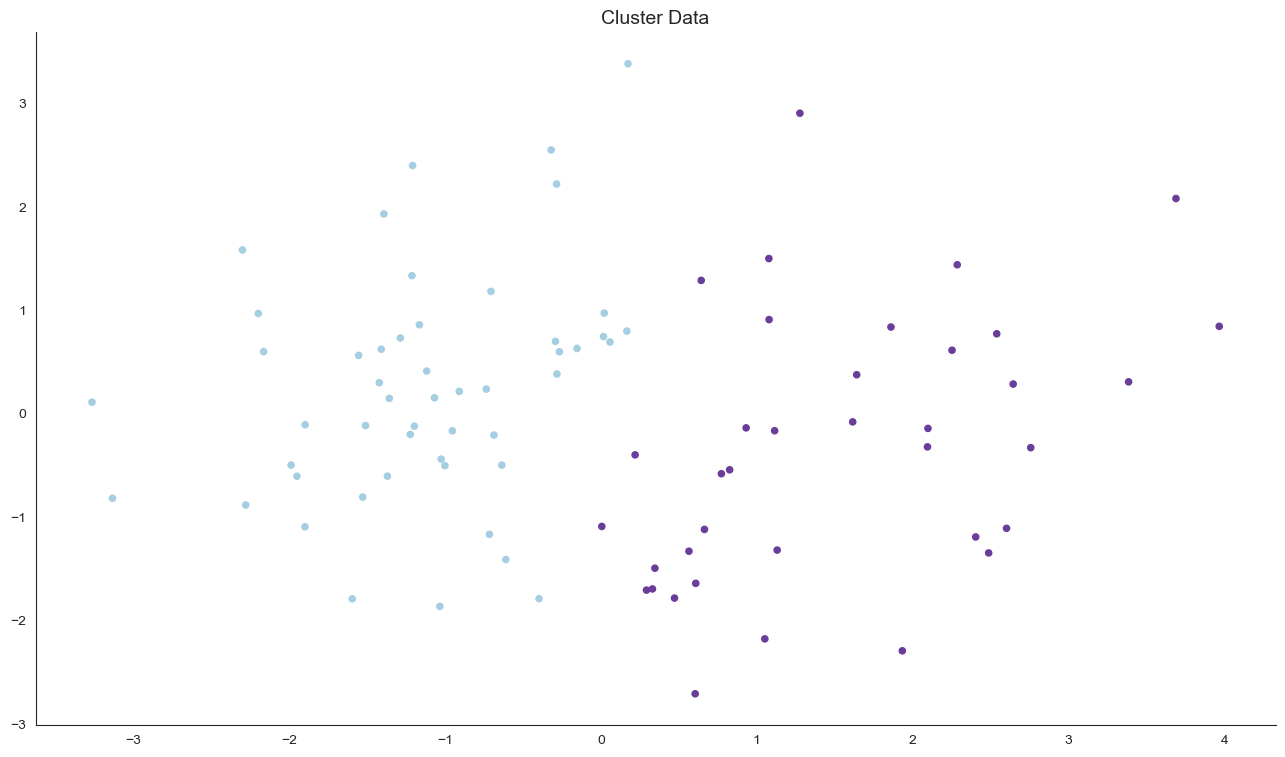

In [10]:

plt.figure(figsize=(16, 9))
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=cluster_labels_train, s=20, cmap=cmap)
plt.title('Cluster Data', fontsize=14)
sns.despine();

# Voronoi Plot

definer metoden:

In [11]:
def plot_voronoi(x, y, labels, centroids, assignments,
                 distance, iteration, step, ax, delay=1):
    ax.clear()
    ax.scatter(x, y, c=labels, s=20, cmap=cmap)

    # plot cluster centers
    ax.scatter(*centroids.T,
               marker='o',
               c='w',
               s=200,
               edgecolor='k',
               zorder=9)

    for i, c in enumerate(centroids):
        ax.scatter(c[0], c[1],
                   marker=f'${i}$',
                   s=50,
                   edgecolor='k',
                   zorder=10)

    # plot links to centroid
    cx, cy = centroids.T
    for i, label in enumerate(assignments):
        ax.plot([x[i], cx[label]], 
                [y[i], cy[label]], 
                ls='--',
                color='k', 
                lw=0.5)

    # plot voronoi
    xx, yy = np.meshgrid(np.arange(x.min() - 1, x.max() + 1, .01),
                         np.arange(y.min() - 1, y.max() + 1, .01))
    Z = Utilities.assign_points(centroids, 
                      np.c_[xx.ravel(),  
                            yy.ravel()],
                            cdist).reshape(xx.shape)
    
    plt.imshow(Z, interpolation='nearest', 
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=cmap, 
               aspect='auto', 
               origin='lower', 
               alpha=.2)
    title = f'Iteration: {iteration} | {step} | Distance: {distance:,.1f}'
    ax.set_title(title)
    sns.despine()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    sleep(delay)

Plot det

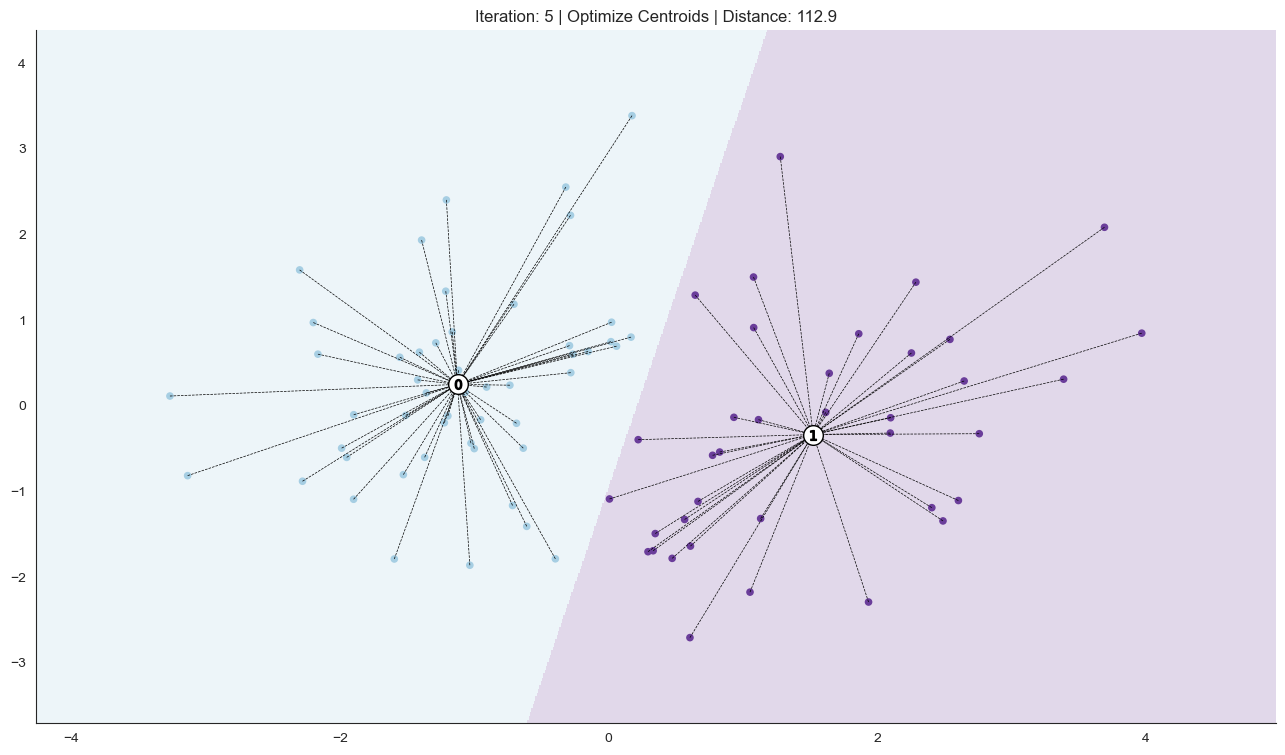

In [12]:
x_init = uniform(X_pca_train[:, 0].min(), X_pca_train[:, 0].max(),
                 size=n_cluster)
y_init = uniform(X_pca_train[:, 1].min(), X_pca_train[:, 1].max(),
                 size=n_cluster)
centroids = np.column_stack((x_init, y_init))

distance = np.sum(np.min(cdist(X_pca_train,
                               centroids),
                         axis=1))

fig, ax = plt.subplots(figsize=(16, 9))

iteration, tolerance, delta = 0, 1e-4, np.inf

while delta > tolerance:
    assignments = Utilities.assign_points(centroids, X_pca_train, cdist)
    plot_voronoi(X_pca_train[:, 0], X_pca_train[:, 1], cluster_labels_train,
                 centroids,
                 assignments,
                 distance,
                 iteration,
                 step='Assign Data',
                 ax=ax)

    centroids = Utilities.optimize_centroids(X_pca_train, assignments)
    delta = distance - Utilities.distance_to_center(centroids,
                                          X_pca_train,
                                          assignments,
                                          cdist)
    distance -= delta

    plot_voronoi(X_pca_train[:, 0], X_pca_train[:, 1], cluster_labels_train,
                 centroids,
                 assignments,
                 distance,
                 iteration,
                 step='Optimize Centroids',
                 ax=ax)
    iteration += 1

# Test Modellen

In [13]:
X_pca_test = pca.fit_transform(X_test)
# Predict clusters for the test dataset
cluster_labels_test = model.predict(X_pca_test)

print(cluster_labels_test)

[0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0]


plot det

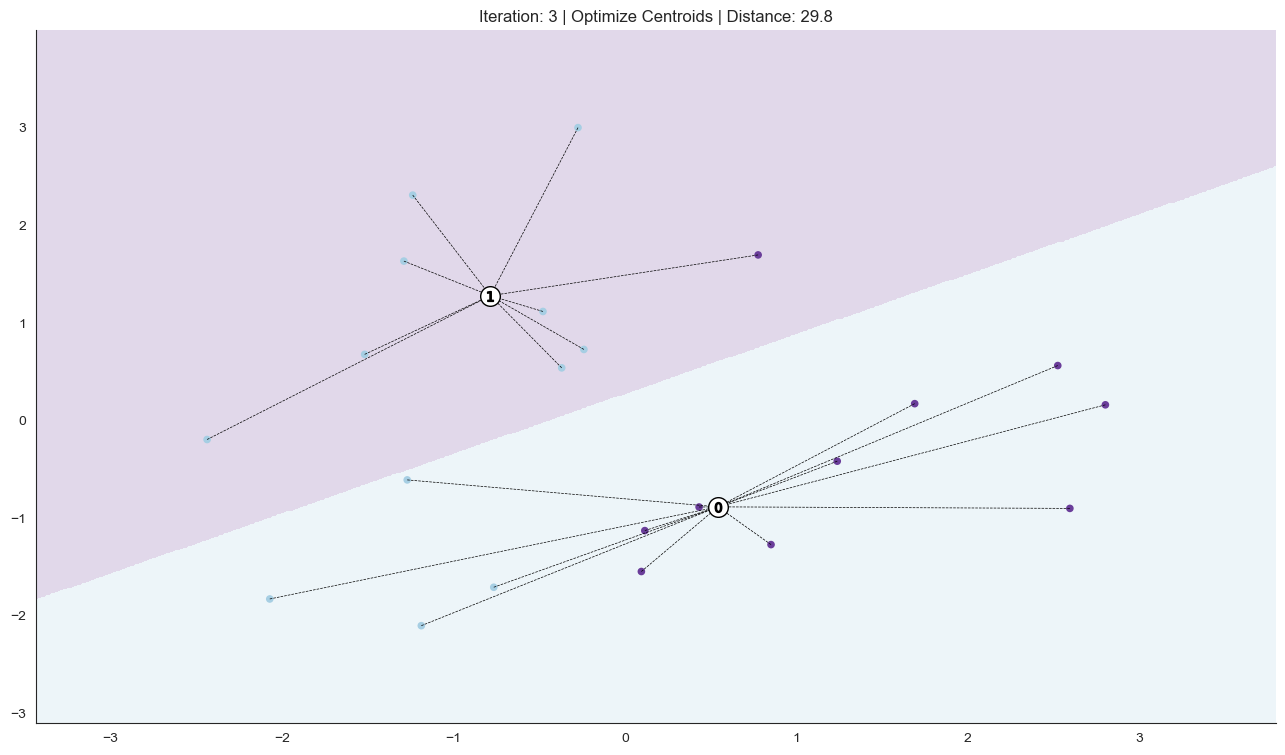

In [14]:
x_init = uniform(X_pca_test[:, 0].min(), X_pca_test[:, 0].max(),
                 size=n_cluster)
y_init = uniform(X_pca_test[:, 1].min(), X_pca_test[:, 1].max(),
                 size=n_cluster)
centroids = np.column_stack((x_init, y_init))

distance = np.sum(np.min(cdist(X_pca_test,
                               centroids),
                         axis=1))

fig, ax = plt.subplots(figsize=(16, 9))

iteration, tolerance, delta = 0, 1e-4, np.inf

while delta > tolerance:
    assignments = Utilities.assign_points(centroids, X_pca_test, cdist)
    plot_voronoi(X_pca_test[:, 0], X_pca_test[:, 1], cluster_labels_test,
                 centroids,
                 assignments,
                 distance,
                 iteration,
                 step='Assign Data',
                 ax=ax)

    centroids = Utilities.optimize_centroids(X_pca_test, assignments)
    delta = distance - Utilities.distance_to_center(centroids,
                                          X_pca_test,
                                          assignments,
                                          cdist)
    distance -= delta

    plot_voronoi(X_pca_test[:, 0], X_pca_test[:, 1], cluster_labels_test,
                 centroids,
                 assignments,
                 distance,
                 iteration,
                 step='Optimize Centroids',
                 ax=ax)
    iteration += 1

# Evaluer Mængden af cluster med inertia

The k-Means objective function suggests we compare the evolution of the inertia or within-cluster variance. Initially, additional centroids decrease the inertia sharply because new clusters improve the overall fit. Once an appropriate number of clusters has been found (assuming it exists), new centroids reduce the within-cluster variance by much less as they tend to split natural groupings. 

Hence, when k-Means finds a good cluster representation of the data, the inertia tends to follow an elbow-shaped path similar to the explained variance ratio for PCA.

In [15]:
def inertia_plot_update(inertias, ax, delay=1):
    inertias.plot(color='k',
                  lw=1,
                  title='Inertia',
                  ax=ax,
                  xlim=(inertias.index[0], inertias.index[-1]),
                  ylim=(0, inertias.max()))
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)    
    display.display(plt.gcf())
    display.clear_output(wait=True)
    sleep(delay)

In [16]:
def plot_kmeans_result(data, labels, centroids,
                       assignments, ncluster, Z, ax):

    # plot data
    ax.scatter(*data.T, c=labels, s=20, cmap=cmap)

    # plot cluster centers
    ax.scatter(*centroids.T,
               marker='o',
               c='w',
               s=200,
               edgecolor='k',
               zorder=9)

    for i, c in enumerate(centroids):
        ax.scatter(*c,
                   marker=f'${i}$',
                   s=50,
                   edgecolor=['k'],
                   zorder=10)
        xy = pd.DataFrame(data[assignments == i],
                          columns=['x', 'y']).assign(cx=c[0],
                                                     cy=c[1])

        ax.plot(xy[['x', 'cx']].T.values,
                xy[['y', 'cy']].T.values,
                ls='--',
                color='k',
                lw=0.5)

    # plot voronoi
    ax.imshow(Z, interpolation='nearest',
              extent=(xx.min(), xx.max(), yy.min(), yy.max()),
              cmap=cmap,
              aspect='auto',
              origin='lower',
              alpha=.2)
    ax.set_title(f'Number of Clusters: {ncluster}')
    plt.tight_layout()

## Run Elbow Experiment


In [17]:
max_clusters = 7
cluster_list = list(range(1, max_clusters + 1))
inertias = pd.Series(index=cluster_list)

In [18]:
#data, labels = sample_clusters(n_clusters=n_clusters)

x, y = X_pca_train.T

In [19]:
xx, yy = np.meshgrid(np.arange(x.min() - 1, x.max() + 1, .01), 
                     np.arange(y.min() - 1, y.max() + 1, .01))

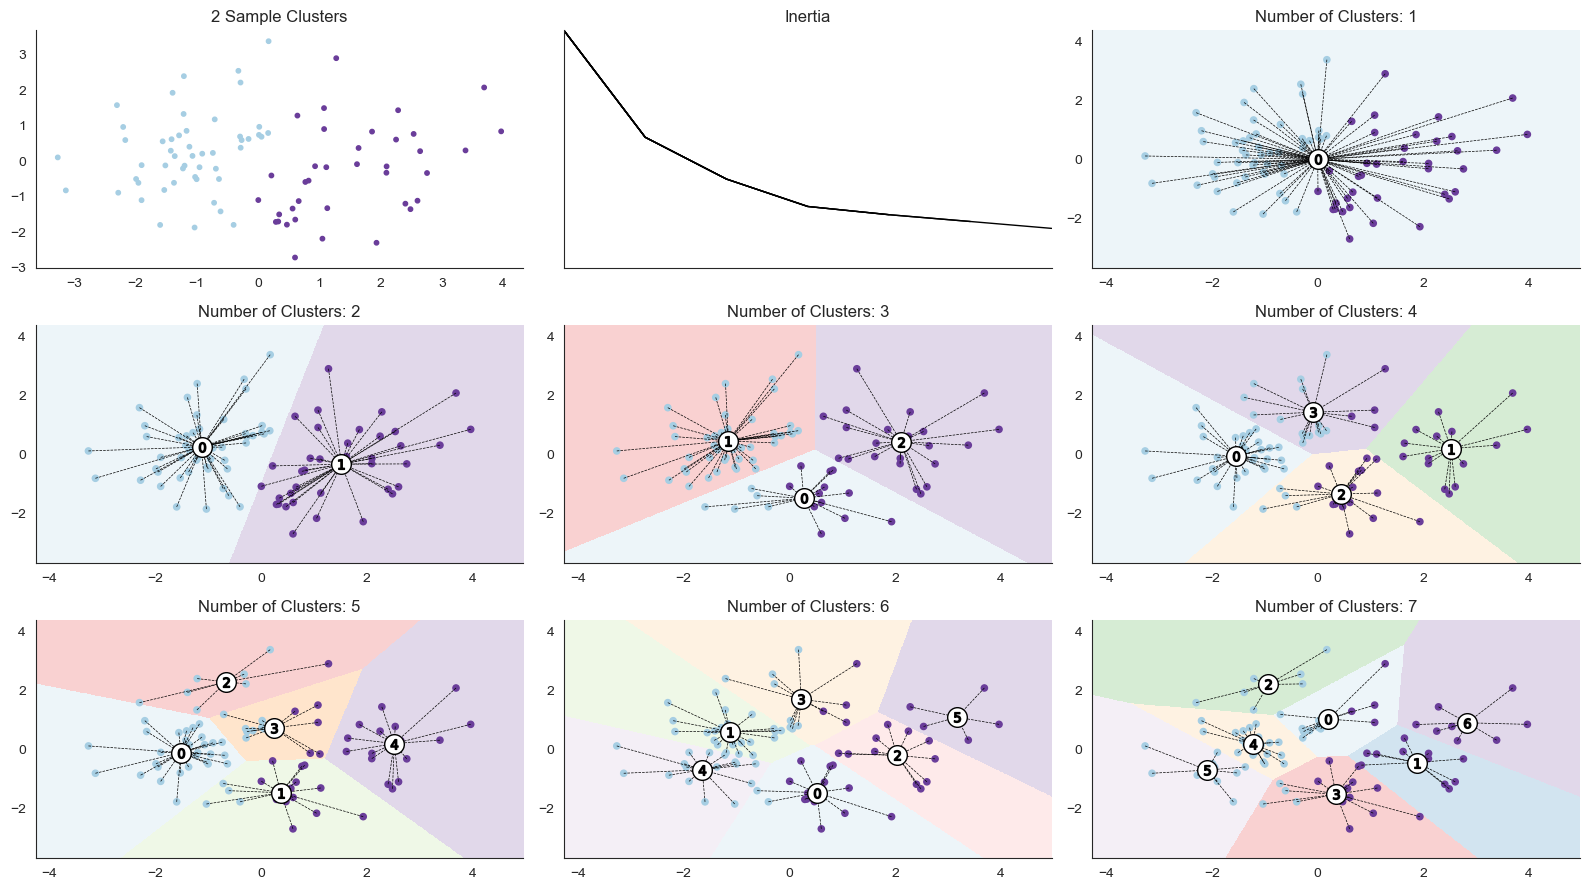

In [20]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(16, 9))
axes = np.array(axes).flatten()

axes[0].scatter(x, y, 
                c=cluster_labels_train, s=10, 
                cmap=cmap)
axes[0].set_title('{} Sample Clusters'.format(n_cluster))
for ax in axes:
    ax.axes.get_xaxis().set_visible(True)
    ax.axes.get_yaxis().set_visible(True)
sns.despine();


for c, n_cluster in enumerate(range(1, max_clusters + 1), 2):
    kmeans = KMeans(n_clusters=n_cluster, random_state=42, n_init=10).fit(X_pca_train)
    centroids, assignments, inertia = kmeans.cluster_centers_, kmeans.labels_, kmeans.inertia_
    inertias[n_cluster] = inertia
    inertia_plot_update(inertias, axes[1])
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plot_kmeans_result(X_pca_train, cluster_labels_train, centroids, assignments,  n_cluster, Z, axes[c])
fig.tight_layout()

# Evaluating the Silhuette Score

The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) provides a more detailed picture of cluster quality. It answers the question: how far are the points in the nearest cluster relative to the points in the assigned cluster?
To this end, it compares the mean intra-cluster distance (a) to the mean distance of the nearest-cluster (b) and computes the following score s:

$$s=\frac{b−a}{\max(a,b)}\quad\in{[−1, 1]}$$

The score can vary between -1 and 1, but negative values are unlikely in practice because they imply that the majority of points are assigned to the wrong cluster. A useful visualization of the silhouette score compares the values for each data point to the global average because it highlights the coherence of each cluster relative to the global configuration. The rule of thumb is to avoid clusters with mean scores below the average for all samples.

The following figure shows an excerpt from the silhouette plot for three and four clusters, where the former highlights the poor fit of cluster 1 by sub-par contributions to the global silhouette score, whereas all of the four clusters have some values that exhibit above-average scores.

In [21]:
def plot_silhouette(values, y_lower, i, n_cluster, ax):
    cluster_size = values.shape[0]
    y_upper = y_lower + cluster_size

    color = plt.cm.viridis(i / n_cluster)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, values,
                facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
    y_lower = y_upper + 10
    return y_lower

In [22]:
def format_silhouette_plot(ax):
    ax.set_title("Silhouette Plot")
    ax.set_xlabel(f"Silhouette Coefficient: {silhouette_avg}")
    ax.set_ylabel("Cluster Label")
    ax.axvline(x=silhouette_avg, 
               color='red', 
               linestyle='--', 
               lw=1)
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

In [23]:
def plot_final_assignments(x, y, centroids, 
                           assignments, n_cluster, ax):
    c = plt.cm.viridis(assignments / n_cluster)
    ax.scatter(x, y, marker='.', s=30, 
               lw=0, alpha=0.7, c=c, edgecolor='k')
    ax.scatter(*centroids.T, marker='o',  
               c='w', s=200, edgecolor='k')
    for i, c in enumerate(centroids):
        ax.scatter(*c, marker='${}$'.format(i), 
                   s=50, edgecolor='k')

    ax.set_title('{} Clusters'.format(n_cluster))

In [24]:
cluster_list = list(range(1, max_clusters + 1))
inertias = pd.Series(index=cluster_list)

In [25]:

x, y = X_pca_train.T

0.34576529305235343


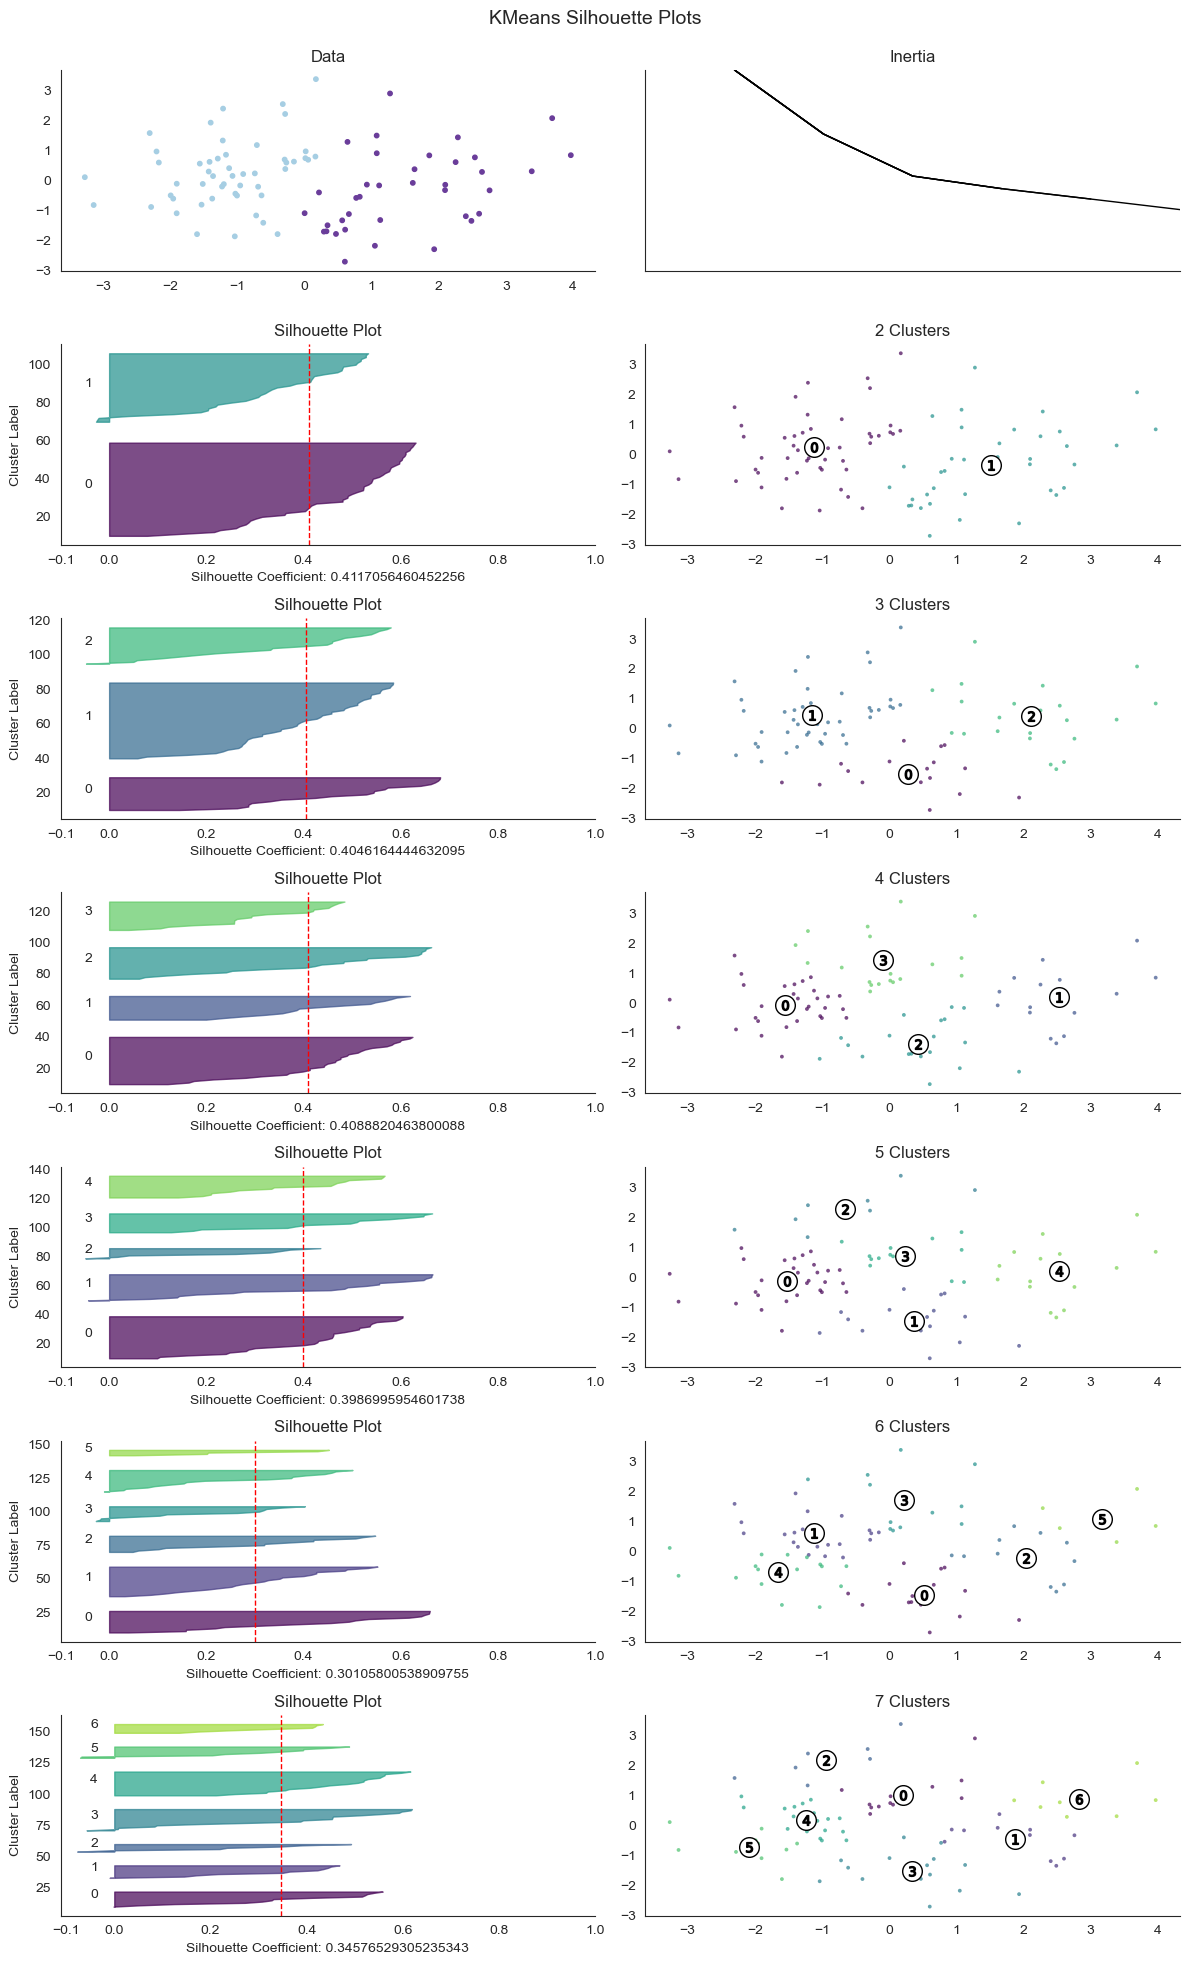

In [26]:
fig, axes = plt.subplots(ncols=2,
                         nrows=max_clusters,
                         figsize=(12, 20))

axes[0][0].scatter(x, y, c=cluster_labels_train, s=10, cmap=cmap)
axes[0][0].set_title('Data')

for i in range(max_clusters):
    for j in [0, 1]:
        axes[i][j].axes.get_xaxis().set_visible(True)
        axes[i][j].axes.get_yaxis().set_visible(True)
sns.despine()

for row, n_cluster in enumerate(range(2, max_clusters + 1), 1):
    kmeans = KMeans(n_clusters=n_cluster,
                    random_state=42, n_init=10).fit(X_pca_train)

    centroids, assignments, inertia = (kmeans.cluster_centers_,
                                       kmeans.labels_,
                                       kmeans.inertia_)
    inertias[n_cluster] = inertia
    inertia_plot_update(inertias, axes[0][1])

    silhouette_avg = silhouette_score(X_pca_train, assignments)
    silhouette_values = silhouette_samples(X_pca_train, assignments)
    silhouette_plot, cluster_plot = axes[row]

    y_lower = 10
    for i in range(n_cluster):
        y_lower = plot_silhouette(np.sort(silhouette_values[assignments == i]),
                                  y_lower,
                                  i,
                                  n_cluster,
                                  silhouette_plot)
    format_silhouette_plot(silhouette_plot)
    plot_final_assignments(x, y, centroids, assignments,
                           n_cluster, cluster_plot)
    fig.tight_layout()
    print(silhouette_avg)


fig.suptitle(f'KMeans Silhouette Plots',
             fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=.95)